In [1]:
import pandas as pd
import numpy as np

In [3]:
# Timestamp
pd.Timestamp("6th jan 2023 8:10").hour

8

In [5]:
#DatetimeIndex
pd.DatetimeIndex([pd.Timestamp("6th jan 2023 8:10"),pd.Timestamp("7th jan 2023 8:10"),pd.Timestamp("8th jan 2023 8:10")])

DatetimeIndex(['2023-01-06 08:10:00', '2023-01-07 08:10:00',
               '2023-01-08 08:10:00'],
              dtype='datetime64[ns]', freq=None)

In [6]:
#date_range()
pd.date_range(start="2023-1-2",end="2023-1-31",freq="D")

DatetimeIndex(['2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05',
               '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09',
               '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13',
               '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17',
               '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21',
               '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25',
               '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29',
               '2023-01-30', '2023-01-31'],
              dtype='datetime64[ns]', freq='D')

In [9]:
#to_datetime()
s=pd.Series(["2023/1/6","2023/1/7","2023/1/8"])
s

0    2023/1/6
1    2023/1/7
2    2023/1/8
dtype: object

In [10]:
pd.to_datetime(s)

0   2023-01-06
1   2023-01-07
2   2023-01-08
dtype: datetime64[ns]

#### Timedelta Object
- Represent a duration,the difference between two date or time

In [14]:
# creating using Timestamp objects
t1=pd.Timestamp("6th jan 2023 8:20:14")
t2=pd.Timestamp("26th jan 2023 10:00:00")
t2-t1

t1-t2

Timedelta('-21 days +22:20:14')

In [16]:
#standalone creation
pd.Timedelta(days=2,hours=10,minutes=35)

Timedelta('2 days 10:35:00')

In [17]:
#Airthmatic 
pd.Timestamp("6th Jan 2023")+pd.Timedelta(days=2,hours=10,minutes=35)

Timestamp('2023-01-08 10:35:00')

In [18]:
pd.date_range(start="2023-1-6",end="2023-1-31",freq="D")+pd.Timedelta(days=2,hours=10,minutes=35)

DatetimeIndex(['2023-01-08 10:35:00', '2023-01-09 10:35:00',
               '2023-01-10 10:35:00', '2023-01-11 10:35:00',
               '2023-01-12 10:35:00', '2023-01-13 10:35:00',
               '2023-01-14 10:35:00', '2023-01-15 10:35:00',
               '2023-01-16 10:35:00', '2023-01-17 10:35:00',
               '2023-01-18 10:35:00', '2023-01-19 10:35:00',
               '2023-01-20 10:35:00', '2023-01-21 10:35:00',
               '2023-01-22 10:35:00', '2023-01-23 10:35:00',
               '2023-01-24 10:35:00', '2023-01-25 10:35:00',
               '2023-01-26 10:35:00', '2023-01-27 10:35:00',
               '2023-01-28 10:35:00', '2023-01-29 10:35:00',
               '2023-01-30 10:35:00', '2023-01-31 10:35:00',
               '2023-02-01 10:35:00', '2023-02-02 10:35:00'],
              dtype='datetime64[ns]', freq='D')

In [19]:
# reallife example
df=pd.read_csv("C:/Users/91993/Desktop/campusx_EDA/session 22/deliveries.csv")

In [21]:
df.head()

,order_date,delivery_date
0,5/24/98,2/5/99
1,4/22/92,3/6/98
2,2/10/91,8/26/92
3,7/21/92,11/20/97
4,9/2/93,6/10/98


In [22]:
# on an average how much time it take to deliver 

In [25]:
df.shape

(501, 2)

In [27]:
df.info() # both date columns are in string

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   order_date     501 non-null    object
 1   delivery_date  501 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [34]:
# convert both columns into date time stamp
df["order_date"]=pd.to_datetime(df["order_date"])

In [35]:
df["delivery_date"]=pd.to_datetime(df["delivery_date"])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   order_date     501 non-null    datetime64[ns]
 1   delivery_date  501 non-null    datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 8.0 KB


In [39]:
df["delivery_time_period"]=df["delivery_date"]-df["order_date"]

In [41]:
df.head()

,order_date,delivery_date,delivery_time_period
0,1998-05-24,1999-02-05,257 days
1,1992-04-22,1998-03-06,2144 days
2,1991-02-10,1992-08-26,563 days
3,1992-07-21,1997-11-20,1948 days
4,1993-09-02,1998-06-10,1742 days


In [42]:
df["delivery_time_period"].mean()

Timedelta('1217 days 22:53:53.532934128')

### Time series

A time series is a data set that tracks a sample over time. In particular, a time series allows one to see what factors influence certain variables from period to period. Time series analysis can be useful to see how a given asset, security, or economic variable changes over time.

Examples

- Financial Data (Company stocks)
- Natural Data (Rainfall measurement)
- Event Data (Covid)
- Medical Data (Heart rate monitoring)

Types of Operations done on Time Series

- Time Series Analysis
- Time Series Forecasting

In [43]:
google=pd.read_csv("C:/Users/91993/Desktop/campusx_EDA/session 22/google.csv")

In [45]:
google.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
1,2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2,2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
3,2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
4,2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276


In [46]:
google.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
4466,2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
4467,2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
4468,2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100
4469,2022-05-19,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600
4470,2022-05-20,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100


In [47]:
pd.read_csv("C:/Users/91993/Desktop/campusx_EDA/session 22/login.csv")

,1,466,2017-01-07 18:24:07,Unnamed: 3
0,2,466,2017-01-07 18:24:55,NaN
1,3,458,2017-01-07 18:25:18,NaN
2,4,458,2017-01-07 18:26:21,NaN
3,5,592,2017-01-07 19:09:59,NaN
4,6,393,2017-01-08 00:41:19,NaN
...,...,...,...,...
2997,2999,1307,2018-01-04 10:48:28,183.82.121.201
2998,3000,1230,2018-01-04 11:22:00,47.247.147.114
2999,3001,1307,2018-01-04 13:13:44,183.82.121.201
3000,3002,1307,2018-01-04 13:13:45,183.82.121.201


In [48]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4471 non-null   object 
 1   Open       4471 non-null   float64
 2   High       4471 non-null   float64
 3   Low        4471 non-null   float64
 4   Close      4471 non-null   float64
 5   Adj Close  4471 non-null   float64
 6   Volume     4471 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 244.6+ KB


In [50]:
google["Date"]=pd.to_datetime(google["Date"])

In [51]:
google.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4471 entries, 0 to 4470
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4471 non-null   datetime64[ns]
 1   Open       4471 non-null   float64       
 2   High       4471 non-null   float64       
 3   Low        4471 non-null   float64       
 4   Close      4471 non-null   float64       
 5   Adj Close  4471 non-null   float64       
 6   Volume     4471 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 244.6 KB


In [54]:
google.set_index("Date",inplace=True)

In [55]:
google

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276
...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100


In [56]:
#fetching a specific date 
google.loc["2022-02-18"]

Open         2.660750e+03
High         2.676480e+03
Low          2.606141e+03
Close        2.609350e+03
Adj Close    2.609350e+03
Volume       1.592900e+06
Name: 2022-02-18 00:00:00, dtype: float64

In [57]:
# partial indexing -> select a particular year/month
google.loc["2020-01"] # data for particular month 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,1341.550049,1368.140015,1341.550049,1367.369995,1367.369995,1406600
2020-01-03,1347.859985,1372.500000,1345.543945,1360.660034,1360.660034,1186400
2020-01-06,1350.000000,1396.500000,1350.000000,1394.209961,1394.209961,1732300
2020-01-07,1397.939941,1402.989990,1390.380005,1393.339966,1393.339966,1502700
2020-01-08,1392.079956,1411.579956,1390.839966,1404.319946,1404.319946,1528000
2020-01-09,1420.569946,1427.329956,1410.270020,1419.829956,1419.829956,1500900
2020-01-10,1427.560059,1434.928955,1418.349976,1429.729980,1429.729980,1820700
2020-01-13,1436.130005,1440.520020,1426.020020,1439.229980,1439.229980,1652300
2020-01-14,1439.010010,1441.800049,1428.369995,1430.880005,1430.880005,1558900


In [58]:
google.loc["2022"] # for particular year data 

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,2889.510010,2911.000000,2870.050049,2901.489990,2901.489990,1260700
2022-01-04,2911.010010,2932.199951,2876.322998,2888.330078,2888.330078,1146400
2022-01-05,2883.620117,2885.959961,2750.469971,2753.070068,2753.070068,2482100
2022-01-06,2749.949951,2793.719971,2735.270020,2751.020020,2751.020020,1452500
2022-01-07,2758.100098,2765.094971,2715.780029,2740.090088,2740.090088,970400
...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100


In [59]:
# creating year and month-name and day-name 
google.index.month_name()

Index(['August', 'August', 'August', 'August', 'August', 'August', 'August',
       'August', 'August', 'September',
       ...
       'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May', 'May'],
      dtype='object', name='Date', length=4471)

In [60]:
google["month_name"]=google.index.month_name()

In [61]:
google["day_name"]=google.index.day_name()

In [62]:
google["quarter"]=google.index.quarter

In [64]:
google.head()

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


In [71]:
#slicing
google.loc["2006-01-9":"2008-01-01":2] # for alternate date 

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2006-01-09,232.334152,235.816101,229.609375,232.578247,232.578247,25679694,January,Monday,1
2006-01-11,234.755081,236.667908,233.713989,234.934402,234.934402,18082324,January,Wednesday,1
2006-01-13,231.288071,232.573257,229.943115,232.254456,232.254456,15370598,January,Friday,1
2006-01-18,222.814835,227.826050,220.797394,221.624298,221.624298,41124971,January,Wednesday,1
2006-01-20,218.530899,219.193405,196.632965,198.984161,198.984161,82541631,January,Friday,1
...,...,...,...,...,...,...,...,...,...
2007-12-17,342.715424,346.411560,330.595856,333.365479,333.365479,11013126,December,Monday,4
2007-12-19,335.846161,338.481293,333.250885,337.420258,337.420258,8875343,December,Wednesday,4
2007-12-21,347.636963,348.324402,345.325623,347.044189,347.044189,10804346,December,Friday,4


In [72]:
# challange -> fetch info for particular date every year->limitaion of time delta 

In [73]:
google.head()


,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897,August,Monday,3
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808,August,Tuesday,3
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276,August,Wednesday,3


In [75]:
google[google.index.isin(pd.date_range(start="2005-1-6",end="2022-1-6",freq=pd.DateOffset(years=1)))]

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2005-01-06,97.175758,97.584229,93.509506,93.922951,93.922951,20852067,January,Thursday,1
2006-01-06,227.581970,234.371521,225.773743,231.960556,231.960556,35646914,January,Friday,1
2009-01-06,165.868286,169.763687,162.585587,166.406265,166.406265,12898566,January,Tuesday,1
2010-01-06,311.761444,311.761444,302.047852,302.994293,302.994293,7987226,January,Wednesday,1
2011-01-06,304.199799,308.060303,303.885956,305.604523,305.604523,4131026,January,Thursday,1
2012-01-06,328.344299,328.767700,323.681763,323.796326,323.796326,5405987,January,Friday,1
2014-01-06,554.426880,557.340942,551.154114,556.573853,556.573853,3551864,January,Monday,1
2015-01-06,513.589966,514.761719,499.678131,500.585632,500.585632,2899940,January,Tuesday,1
2016-01-06,730.000000,747.179993,728.919983,743.619995,743.619995,1947000,January,Wednesday,1


<AxesSubplot:xlabel='Date'>

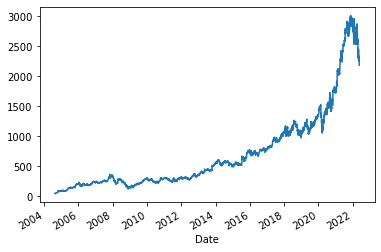

In [77]:
# viz a single col
google["Close"].plot()

In [80]:
# viz all cols together
subset_google=google[["High","Low","Volume","Adj Close"]]

In [78]:
google.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'month_name',
       'day_name', 'quarter'],
      dtype='object')

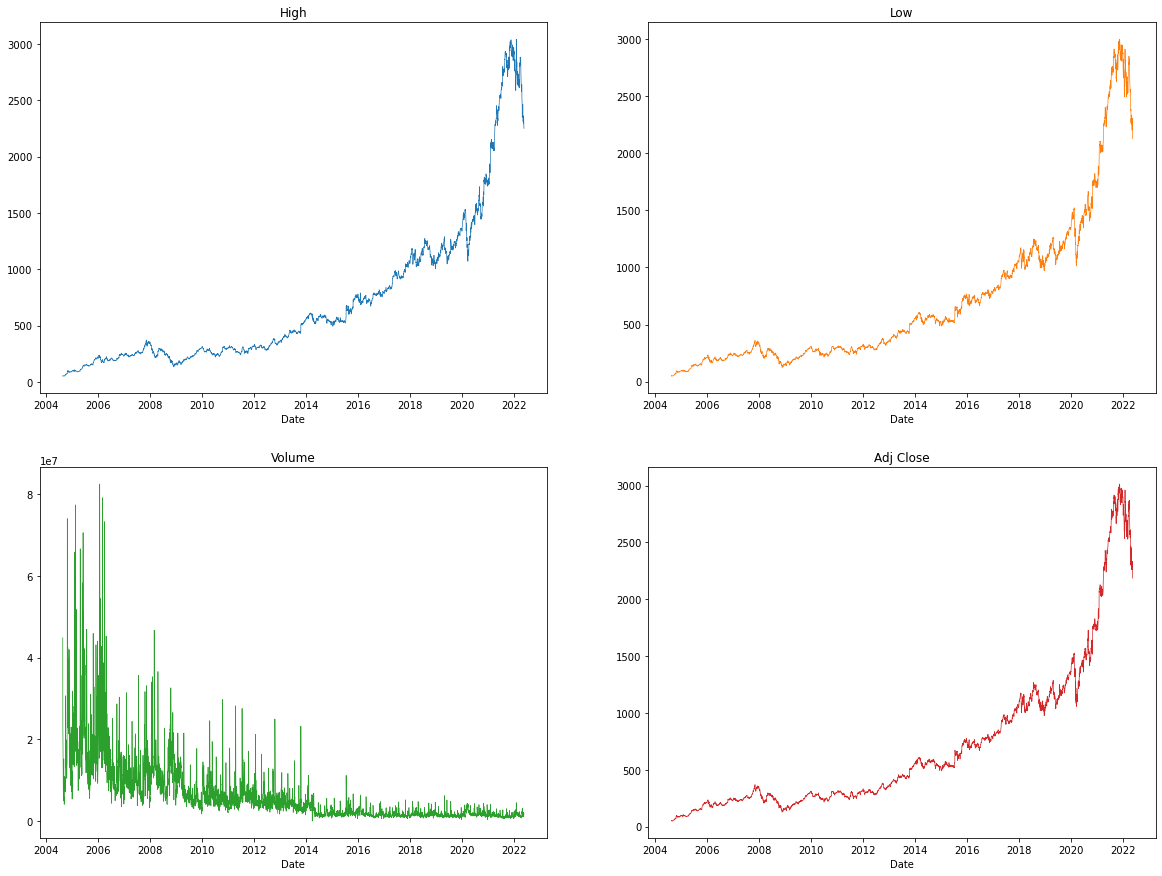

In [81]:
ax=subset_google.plot(subplots=True,layout=(2,2),sharex=False,sharey=False,linewidth=0.7,fontsize=10,legend=False,figsize=(20,15),title=["High","Low","Volume","Adj Close"])

<AxesSubplot:xlabel='Date'>

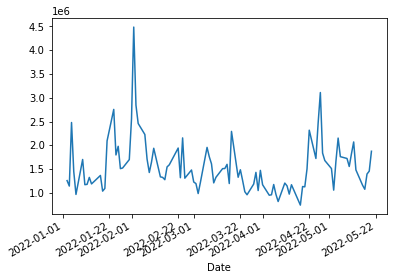

In [83]:
# plot for particular year/months/weeks
google.loc["2022"]["Volume"].plot()

<AxesSubplot:xlabel='Date'>

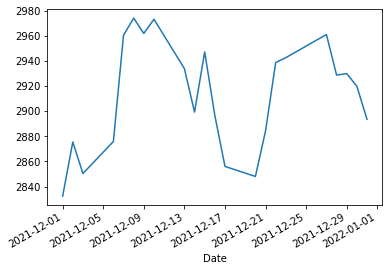

In [85]:
google.loc["2021-12"]["Close"].plot() #monthly trend

In [88]:
#frequency
google.index # here frequency is None 

DatetimeIndex(['2004-08-19', '2004-08-20', '2004-08-23', '2004-08-24',
               '2004-08-25', '2004-08-26', '2004-08-27', '2004-08-30',
               '2004-08-31', '2004-09-01',
               ...
               '2022-05-09', '2022-05-10', '2022-05-11', '2022-05-12',
               '2022-05-13', '2022-05-16', '2022-05-17', '2022-05-18',
               '2022-05-19', '2022-05-20'],
              dtype='datetime64[ns]', name='Date', length=4471, freq=None)

In [89]:
#asfrequency
google.asfreq("D") # frequency set daily wise, here nan value came because of it is weekend date 

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100.0,May,Monday,2.0
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800.0,May,Tuesday,2.0
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100.0,May,Wednesday,2.0


In [90]:
google.asfreq("B") # B-business day 

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19,49.813290,51.835709,47.800831,49.982655,49.982655,44871361.0,August,Thursday,3.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,53.952770,22942874.0,August,Friday,3.0
2004-08-23,55.168217,56.528118,54.321388,54.495735,54.495735,18342897.0,August,Monday,3.0
2004-08-24,55.412300,55.591629,51.591621,52.239197,52.239197,15319808.0,August,Tuesday,3.0
2004-08-25,52.284027,53.798351,51.746044,52.802086,52.802086,9232276.0,August,Wednesday,3.0
...,...,...,...,...,...,...,...,...,...
2022-05-16,2307.679932,2332.149902,2286.699951,2295.850098,2295.850098,1164100.0,May,Monday,2.0
2022-05-17,2344.550049,2344.550049,2306.750000,2334.030029,2334.030029,1078800.0,May,Tuesday,2.0
2022-05-18,2304.750000,2313.913086,2242.840088,2248.020020,2248.020020,1399100.0,May,Wednesday,2.0


In [91]:
google.asfreq("Q") # for quaterly

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-09-30,64.707458,65.902977,64.259140,64.558022,64.558022,13823420.0,September,Thursday,3.0
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday,4.0
2005-03-31,88.642746,90.356323,88.488327,89.917969,89.917969,13587941.0,March,Thursday,1.0
2005-06-30,146.620438,148.906860,144.976593,146.525787,146.525787,30301955.0,June,Thursday,2.0
2005-09-30,156.523315,158.157181,155.561920,157.639130,157.639130,18371203.0,September,Friday,3.0
...,...,...,...,...,...,...,...,...,...
2021-03-31,2059.120117,2093.326904,2056.745117,2068.629883,2068.629883,1459900.0,March,Wednesday,1.0
2021-06-30,2513.071045,2516.000000,2495.149902,2506.320068,2506.320068,1200300.0,June,Wednesday,2.0
2021-09-30,2686.500000,2711.800049,2660.000000,2665.310059,2665.310059,1764700.0,September,Thursday,3.0


In [92]:
google.asfreq("Y") # yearly end data 

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-12-31,99.243011,99.566795,95.920464,96.035034,96.035034,15394487.0,December,Friday,4.0
2005-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-12-31,347.980682,349.933350,344.000610,344.448914,344.448914,4770213.0,December,Monday,4.0
2008-12-31,151.532028,154.919327,150.739990,153.250580,153.250580,5795241.0,December,Wednesday,4.0
2009-12-31,311.208527,311.532288,308.832428,308.832428,308.832428,2448744.0,December,Thursday,4.0
2010-12-31,297.255798,298.092682,294.909607,295.875977,295.875977,3090139.0,December,Friday,4.0
2011-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-31,348.693024,353.958282,346.700470,352.369232,352.369232,4009773.0,December,Monday,4.0


In [94]:
google.asfreq("6H",method="bfill") # fill the Nan data with previous value 

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-19 06:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-19 12:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-19 18:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2
2022-05-19 06:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100,May,Friday,2
2022-05-19 12:00:00,2241.709961,2251.000000,2127.459961,2186.260010,2186.260010,1878100,May,Friday,2


In [95]:
google.asfreq("6H",method="ffill") # filling data with forward data  

,Open,High,Low,Close,Adj Close,Volume,month_name,day_name,quarter
Date,,,,,,,,,
2004-08-19 00:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-19 06:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-19 12:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-19 18:00:00,49.813290,51.835709,47.800831,49.982655,49.982655,44871361,August,Thursday,3
2004-08-20 00:00:00,50.316402,54.336334,50.062355,53.952770,53.952770,22942874,August,Friday,3
...,...,...,...,...,...,...,...,...,...
2022-05-19 00:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2
2022-05-19 06:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2
2022-05-19 12:00:00,2236.820068,2271.750000,2209.360107,2214.909912,2214.909912,1459600,May,Thursday,2


<AxesSubplot:xlabel='Date'>

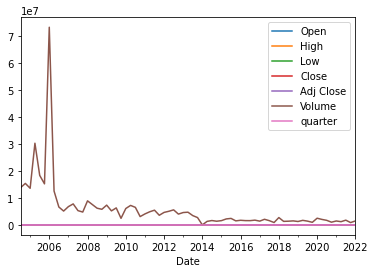

In [97]:
#Quaterly trend
google.asfreq("Q",method="ffill").plot()

<AxesSubplot:xlabel='month_name'>

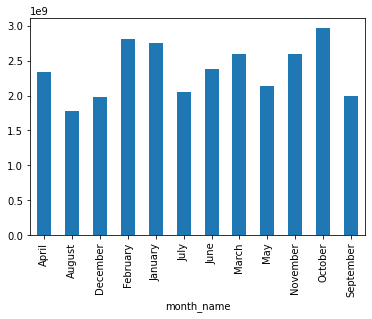

In [101]:
# monthly trend
google.groupby("month_name")["Volume"].sum().plot(kind="bar")

<AxesSubplot:xlabel='month_name'>

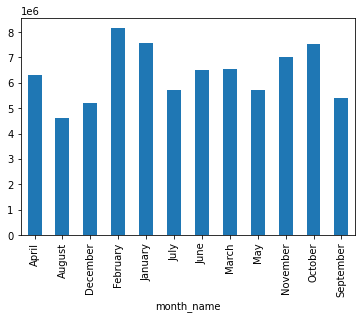

In [102]:
google.groupby("month_name")["Volume"].mean().plot(kind="bar")

<AxesSubplot:xlabel='day_name'>

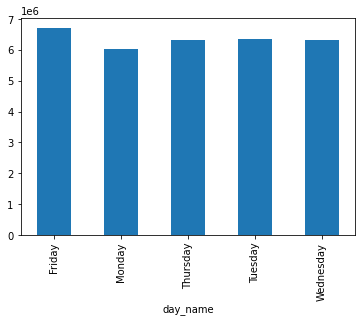

In [103]:
google.groupby("day_name")["Volume"].mean().plot(kind="bar")

<AxesSubplot:xlabel='quarter'>

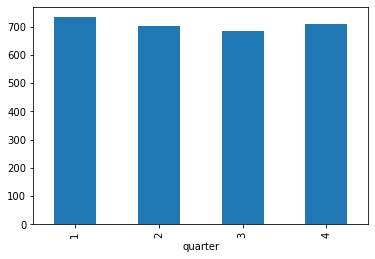

In [112]:
#quaterly trends
google.groupby("quarter")["Close"].mean().plot(kind="bar")

#### Resampling
- resampling involves changing the frequency of your time Series observations.
- Two types of resampling
1. Upsampling:-> When you increase the frequency of the sample, such as from minutes to seconds  
2. Downsampling:-> Where you decrease the frequency of the samples,such as from days to months 

In [113]:
 # Downsampling

<AxesSubplot:xlabel='Date'>

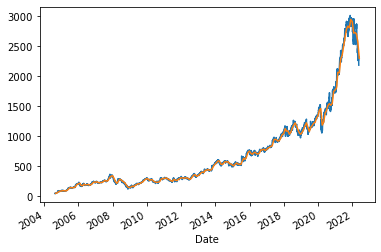

In [120]:
google["Close"].plot()
google["Close"].resample("m").mean().plot()

<AxesSubplot:xlabel='Date'>

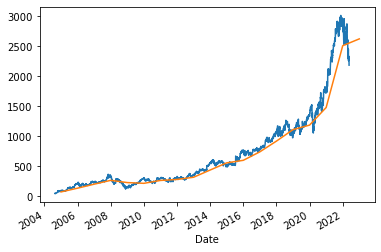

In [121]:
google["Close"].plot()
google["Close"].resample("y").mean().plot()

In [122]:
 # upsampling

In [127]:
google["Close"].resample("H").interpolate(method="spline",order=2).plot()

ImportError: Pandas requires version '1.7.1' or newer of 'scipy' (version '1.6.2' currently installed).

In [124]:
pd.__version__

'1.5.3'

#### Rolling Window(Smoothing)
- Time Series data in original format can be quite volatile,espically on smaller aggregation levels. The concept of rolling, or moving average is a useful techinque for smoothing time series data.

<AxesSubplot:xlabel='Date'>

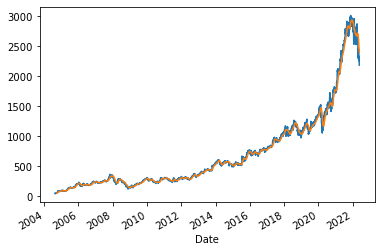

In [131]:
# rolling window
google["Close"].plot()
google["Close"].rolling(30).mean().plot()

<AxesSubplot:xlabel='Date'>

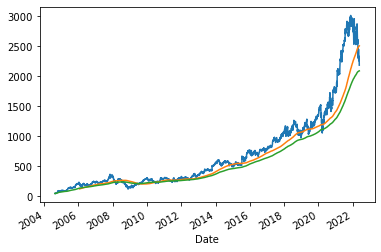

In [136]:
google["Close"].plot()
google["Close"].rolling(365).mean().plot()
google["Close"].ewm(365).mean().plot() #exponential weighting

#### Shifting
The shift() function is Pandas is used to, well shift the entire series up or down by the desiired numnber of periods

In [139]:
#shift()
google["Close"]

Date
2004-08-19      49.982655
2004-08-20      53.952770
2004-08-23      54.495735
2004-08-24      52.239197
2004-08-25      52.802086
                 ...     
2022-05-16    2295.850098
2022-05-17    2334.030029
2022-05-18    2248.020020
2022-05-19    2214.909912
2022-05-20    2186.260010
Name: Close, Length: 4471, dtype: float64

In [140]:
google["Close"].shift(1) # 1 step shift of the data 

Date
2004-08-19            NaN
2004-08-20      49.982655
2004-08-23      53.952770
2004-08-24      54.495735
2004-08-25      52.239197
                 ...     
2022-05-16    2330.310059
2022-05-17    2295.850098
2022-05-18    2334.030029
2022-05-19    2248.020020
2022-05-20    2214.909912
Name: Close, Length: 4471, dtype: float64

In [141]:
google["Close"].shift(-1) # -1 step shift of the data 

Date
2004-08-19      53.952770
2004-08-20      54.495735
2004-08-23      52.239197
2004-08-24      52.802086
2004-08-25      53.753517
                 ...     
2022-05-16    2334.030029
2022-05-17    2248.020020
2022-05-18    2214.909912
2022-05-19    2186.260010
2022-05-20            NaN
Name: Close, Length: 4471, dtype: float64

In [142]:
# shift example

In [149]:
df=pd.read_csv("C:/Users/91993/Desktop/campusx_EDA/session 22/login.csv",header=None)
df=df[[1,2]]
df.head()
df.rename(columns={1:"user_id",2:"login_time"},inplace=True)

In [151]:
df.head()

,user_id,login_time
0,466,2017-01-07 18:24:07
1,466,2017-01-07 18:24:55
2,458,2017-01-07 18:25:18
3,458,2017-01-07 18:26:21
4,592,2017-01-07 19:09:59


In [155]:
# Finding the total average time spent by a user in the website 

In [154]:
df["user_id"].value_counts()

413     222
458     208
492     162
882     140
592     122
       ... 
1043      1
1045      1
1047      1
1048      1
880       1
Name: user_id, Length: 433, dtype: int64

In [156]:
# we will choose id 413

In [158]:
user_df=df[df["user_id"]==413]

In [160]:
user_df.head()

,user_id,login_time
11,413,2017-01-09 12:29:25
12,413,2017-01-09 12:40:39
14,413,2017-01-09 14:08:04
33,413,2017-01-10 14:36:23
35,413,2017-01-10 15:22:45


In [161]:
# find the avaerage returning time
# we have to find the duration of subsiquent login then mean after that 

In [163]:
user_df.info() # here the date time not in the logintime

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 11 to 2997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     222 non-null    int64 
 1   login_time  222 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.2+ KB


In [164]:
user_df["login_time"]=pd.to_datetime(user_df["login_time"])

<ipython-input-164-3d95d6160750>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df["login_time"]=pd.to_datetime(user_df["login_time"])


In [166]:
user_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 11 to 2997
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     222 non-null    int64         
 1   login_time  222 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.2 KB


In [168]:
user_df["shifted"]=user_df["login_time"].shift(1)

<ipython-input-168-fce92a476dd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df["shifted"]=user_df["login_time"].shift(1)


In [169]:
user_df

,user_id,login_time,shifted
11,413,2017-01-09 12:29:25,NaT
12,413,2017-01-09 12:40:39,2017-01-09 12:29:25
14,413,2017-01-09 14:08:04,2017-01-09 12:40:39
33,413,2017-01-10 14:36:23,2017-01-09 14:08:04
35,413,2017-01-10 15:22:45,2017-01-10 14:36:23
...,...,...,...
2958,413,2017-12-29 18:20:32,2017-12-29 18:19:48
2963,413,2017-12-30 13:41:21,2017-12-29 18:20:32
2974,413,2018-01-01 15:16:25,2017-12-30 13:41:21
2982,413,2018-01-02 18:15:45,2018-01-01 15:16:25


In [172]:
# here on an average 15days 5 hours ...
(user_df["login_time"]-user_df["shifted"]).mean()

Timedelta('1 days 15:05:13.384615384')